Compute chi-squared stats between each non-negative feature and class.

This score should be used to evaluate categorical variables in a classification task.
This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [1]:
import seaborn as sns
df=sns.load_dataset('titanic')

In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [6]:
import numpy as np


In [7]:
df['sex']=np.where(df['sex']=="male",1,0)
df.head()


,sex,embarked,alone,pclass,survived
0,1,S,False,3,0
1,0,C,False,1,1
2,0,S,True,3,1
3,0,S,False,1,1
4,1,S,True,3,0


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['embarked'] = label_encoder.fit_transform(df['embarked'])

df.head()

,sex,embarked,alone,pclass,survived
0,1,2,False,3,0
1,0,0,False,1,1
2,0,2,True,3,1
3,0,2,False,1,1
4,1,2,True,3,0


In [9]:
df["embarked"].unique()

array([2, 0, 1, 3])

In [10]:
df['alone']=np.where(df['alone']==True,1,0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,2,0,3,0
1,0,0,0,1,1
2,0,2,1,3,1
3,0,2,0,1,1
4,1,2,1,3,0


In [11]:
### train Test split is usually done to avaoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

In [12]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [16]:
X_test.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [17]:
# Chi2 Test


from sklearn.feature_selection import chi2
chi2stat_p_values=chi2(X_train,y_train)



# Returns 2 value
# chi2 ndarray of shape (n_features,)
# 1.Chi2 statistics for each feature.

# p_values ndarray of shape (n_features,)
# 2.P-values for each feature.

In [18]:
chi2stat_p_values

(array([65.67929505,  6.8436521 , 10.88471585, 21.97994154]),
 array([5.30603805e-16, 8.89567920e-03, 9.69610546e-04, 2.75514881e-06]))

In [20]:
chi2stat_p_values[1]

array([5.30603805e-16, 8.89567920e-03, 9.69610546e-04, 2.75514881e-06])

In [21]:
import pandas as pd
p_values=pd.Series(chi2stat_p_values[1])
p_values.index=X_train.columns
print(p_values)

Chi2_stats_value=pd.Series(chi2stat_p_values[0])
Chi2_stats_value.index=X_train.columns

print(Chi2_stats_value)

sex         5.306038e-16
embarked    8.895679e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64
sex         65.679295
embarked     6.843652
alone       10.884716
pclass      21.979942
dtype: float64


In [27]:
Chi2_stats_value.sort_index(ascending=False)

sex         65.679295
pclass      21.979942
embarked     6.843652
alone       10.884716
dtype: float64

In [28]:
Chi2_stats_value.sort_values(ascending=False)

sex         65.679295
pclass      21.979942
alone       10.884716
embarked     6.843652
dtype: float64

#### So , Sex Column is the most important column when compared to the output feature Survived


In [29]:
p_values.sort_index(ascending=False)

sex         5.306038e-16
pclass      2.755149e-06
embarked    8.895679e-03
alone       9.696105e-04
dtype: float64

In [30]:
p_values.sort_values(ascending=False)

embarked    8.895679e-03
alone       9.696105e-04
pclass      2.755149e-06
sex         5.306038e-16
dtype: float64

#### So , embarked Column is the less important column when compared to the output feature Survived 
#### If we want we can drop this feature


<AxesSubplot:>

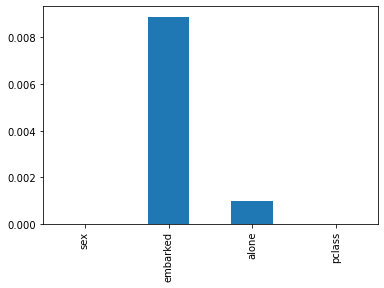

In [48]:
p_values.plot.bar()

#### If lesser p value Feature are more Important

#### Or Higher P value less important or not consider to predict The Model


<AxesSubplot:>

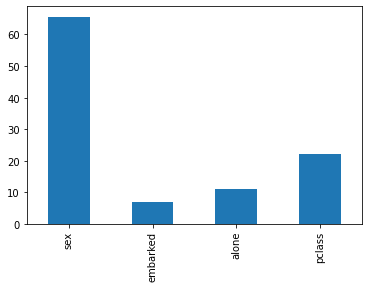

In [49]:
Chi2_stats_value.plot.bar()

#### If Chi2 statistics value more and more high those Feature are more important
